<a href="https://colab.research.google.com/github/Hoshi54/projects_ML/blob/main/Sber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import datetime as dt

with open('/content/20231121_113848.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('/content/20231121_113848.csv',encoding = result['encoding'],sep = ',')
df

,Тип модели,Наименование модели,Наименование датасета для модели,Операция,Категория,Тип кейса,"Фин. эффект, руб",Аномальность,Есть инсайт
0,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Доставка заказа,Длительность операции,Разовые инциденты,349345.281250,0.203134,1
1,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Доставка заказа,NaN,Общий показатель для операции,349345.281250,0.205592,1
2,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Звонок клиенту,Зацикленность,«Возврат»,148.960007,0.218346,1
3,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Звонок клиенту,Зацикленность,«Пинг-Понг»,4.230000,0.255972,1
4,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Звонок клиенту,Зацикленность,В себя,134.130005,1.000000,1
5,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Звонок клиенту,Длительность процесса,Нерегулярная операция,4827.939941,1.000000,1
6,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Звонок клиенту,NaN,Общий показатель для операции,5115.259766,0.603553,1
7,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Оплата,Зацикленность,«Возврат»,19.709999,0.036983,1
8,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Оплата,Зацикленность,В себя,322.989990,0.257080,1
9,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Оплата,NaN,Общий показатель для операции,342.700012,0.640848,1


In [ ]:
df = df.drop(df[df['Тип кейса'] == 'Общий показатель для операции'].index,axis = 0)

In [ ]:
df[df['Тип кейса'] == 'Разовые инциденты']

,Тип модели,Наименование модели,Наименование датасета для модели,Операция,Категория,Тип кейса,"Фин. эффект, руб",Аномальность,Есть инсайт
0,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Доставка заказа,Длительность операции,Разовые инциденты,349345.28125,0.203134,1
16,AutoInsights,base_auto_insight,[2050] SPARTA (DS = 2294),Сборка заказа,Длительность операции,Разовые инциденты,325432.15625,0.000002,1


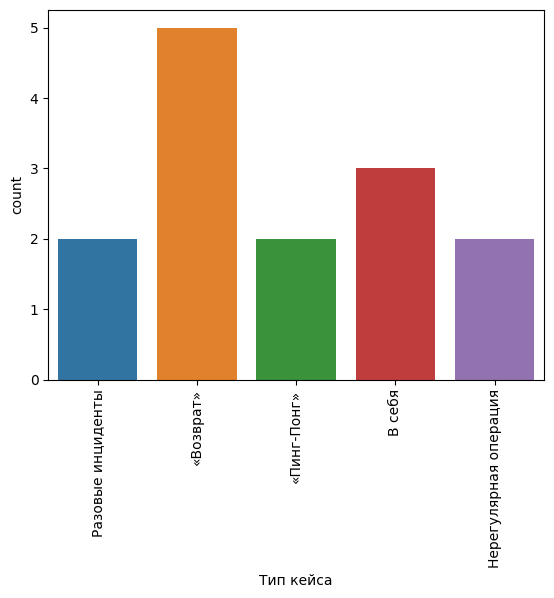

In [ ]:
sns.countplot(data = df,x = 'Тип кейса')
plt.xticks(rotation = 90);

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Разовые инциденты'),
  Text(1, 0, '«Возврат»'),
  Text(2, 0, '«Пинг-Понг»'),
  Text(3, 0, 'В себя'),
  Text(4, 0, 'Нерегулярная операция')])

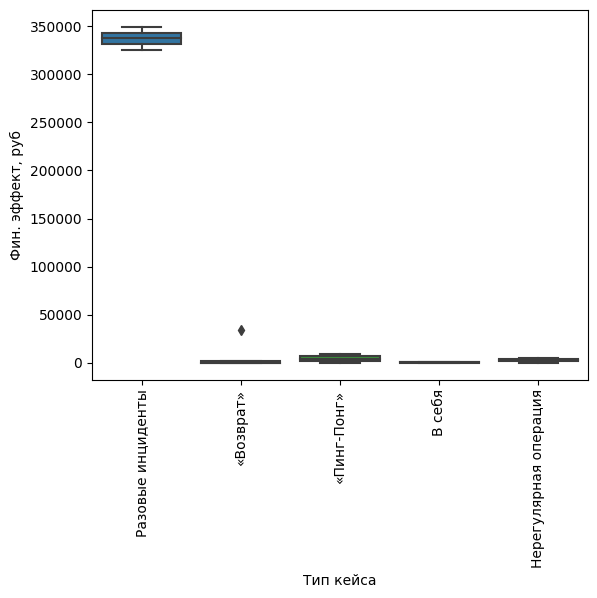

In [ ]:
sns.boxplot(data = df,y = 'Фин. эффект, руб',x = 'Тип кейса')
plt.xticks(rotation = 90)

In [ ]:
def season(month):
  if month in [12,1,2]:
    return 'зима'
  if month in range(3,6):
    return 'весна'
  if month in range(6,9):
    return 'лето'
  if month in range(9,12):
    return 'осень'

In [ ]:
df['start_time'] = df['start_time'].apply(lambda s: dt.datetime.strptime(str(s), "%d.%m.%Y %H:%M"))
df['end_time'] = df['end_time'].apply(lambda s: dt.datetime.strptime(str(s), "%d.%m.%Y %H:%M"))

df['hour_start_time'] = df['start_time'].apply(lambda x: x.hour)
df['minute_start_time'] = df['start_time'].apply(lambda x: x.minute)
df['hour_end_time'] = df['end_time'].apply(lambda x: x.hour)
df['minute_end_time'] = df['end_time'].apply(lambda x: x.minute)
df['month'] = df['end_time'].apply(lambda x: x.month)
df['season'] = df['month'].apply(lambda x: season(x))
df['weekday'] = df['start_time'].apply(lambda x: x.weekday())
df['weekend'] = df['weekday'].apply(lambda x: '0' if x in range(0,5) else '1')
df['delta_time'] = df[['start_time','end_time']].apply(lambda x: (x['end_time'] - x['start_time']).total_seconds() / 60,axis = 1)

In [ ]:
df.groupby('stage').describe()['delta_time']


,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
Доставка заказа,17870.0,32.582261,0.657657,31.0,32.0,33.0,33.0,35.0
Заказ доставлен,15100.0,0.083046,0.275961,0.0,0.0,0.0,0.0,1.0
Заказ оформлен,19988.0,0.088953,0.284684,0.0,0.0,0.0,0.0,1.0
Звонок клиенту,3690.0,2.178591,1.853492,0.0,1.0,2.0,3.0,11.0
Оплата,20248.0,0.419399,0.493473,0.0,0.0,0.0,1.0,1.0
Отмена заказа,4913.0,0.079788,0.270993,0.0,0.0,0.0,0.0,1.0
Передача товара курьеру,17870.0,6.684163,9.081130,1.0,4.0,4.0,5.0,41.0
Поступление заказа сборщику,20941.0,2.196648,5.608912,0.0,1.0,1.0,1.0,35.0
Проверка заказа,15557.0,1.644340,0.481006,1.0,1.0,2.0,2.0,3.0


<Axes: xlabel='start_time', ylabel='delta_time'>

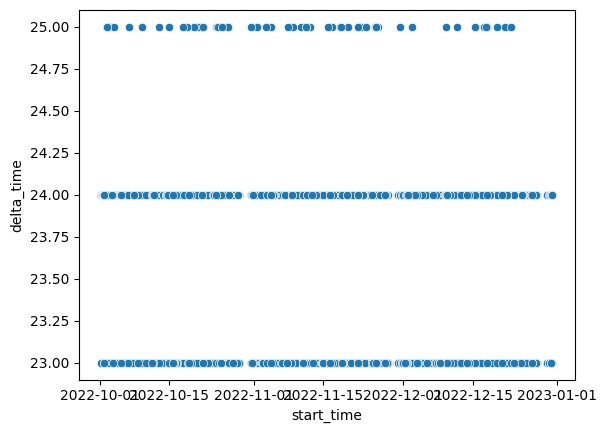

In [ ]:

sns.scatterplot(data = df,x = 'start_time',y = df[df['stage'] == 'Сборка заказа']['delta_time'])


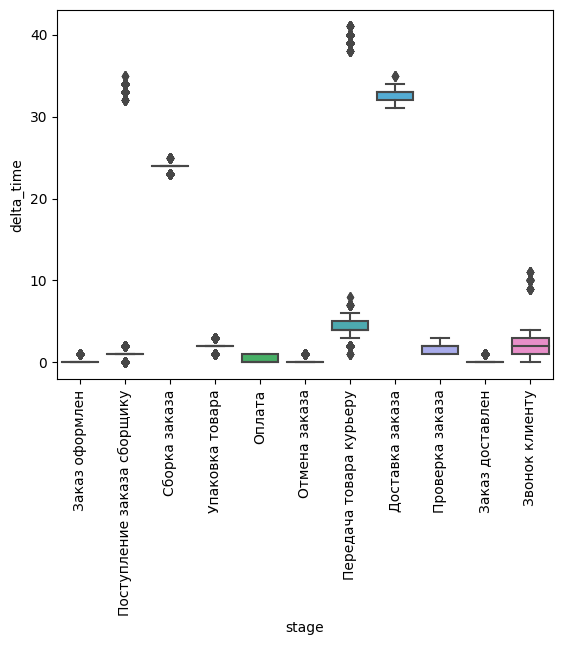

In [ ]:
sns.boxplot(data = df,y = 'delta_time',x = 'stage')
plt.xticks(rotation = 90);

In [ ]:
for i in ['Поступление заказа сборщику','Сборка заказа','Передача товара курьеру','Упаковка товара']:
  q75,q25 = np.percentile(df[df['stage'] == i]['delta_time'],[75,25])
  IQR1 = q75 - q25
  deli1 = q75 + (IQR1 * 1.5)
  IQR2 = q75 - q25
  deli2 = q25 - IQR2 * 1.5
  print(i)
  print(deli)
  print(len(df[(df['stage'] == i) & (df['delta_time'] < deli2)].index))
  #df = df.drop(del_ind,axis = 0)

Поступление заказа сборщику
1.0
667
Сборка заказа
24.0
5119
Передача товара курьеру
2.5
465
Упаковка товара
2.0
933


In [ ]:
for i in list(df['stage'].unique()):
  q75,q25 = np.percentile(df[df['stage'] == i]['delta_time'],[75,25])
  IQR = q75 - q25
  deli = q75 + (IQR * 1.5)
  print(i)
  print(deli)
  print(len(df[(df['stage'] == i) & (df['delta_time'] > deli)]))

Заказ оформлен
0.0
1778
Поступление заказа сборщику
1.0
5194
Сборка заказа
24.0
55
Упаковка товара
2.0
1173
Оплата
2.5
0
Отмена заказа
0.0
392
Передача товара курьеру
6.5
1314
Доставка заказа
34.5
5
Проверка заказа
3.5
0
Заказ доставлен
0.0
1254
Звонок клиенту
6.0
135


In [ ]:
#df['ind'] = [d for d in range(len(df))]
#df[['start_time','end_time','ind']].apply(lambda x: x['end_time'] - x['start_time'].total_seconds(),axis = 1)
df['total_min_start_time'] = df['start_time'].apply(lambda x: x.hour * 60 + x.minute)
df['total_min_end_time'] = df['end_time'].apply(lambda x: x.hour * 60 + x.minute)
#df['delta_start_time'] = df[['total_min_start_time','ind']].apply(lambda x: x['total_min_start_time'] - x['total_min_start_time'][x['ind'] + 1],axis = 1)
df['total_min_start_time -1'] = df['total_min_start_time'].shift(-1,fill_value = 0)
df['delta_end_start_time'] = df[['total_min_end_time','total_min_start_time -1']].apply(lambda x: abs(x['total_min_start_time -1'] - x['total_min_end_time']),axis = 1)

In [ ]:
rast_proc = df[(df['stage'] != 'Отмена заказа') & ((df['stage'] != 'Заказ доставлен'))]
rast_proc['delta_end_start_time + 1'] = rast_proc['delta_end_start_time'].shift(1,fill_value = 0)
rast_proc['delta_time_final'] = rast_proc['delta_end_start_time + 1'] + rast_proc['delta_time']
rast_proc['delta_prics_end_start'] = rast_proc['delta_end_start_time + 1'] * 10

<ipython-input-5-3d3014fcb308>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rast_proc['delta_end_start_time + 1'] = rast_proc['delta_end_start_time'].shift(1,fill_value = 0)
<ipython-input-5-3d3014fcb308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rast_proc['delta_time_final'] = rast_proc['delta_end_start_time + 1'] + rast_proc['delta_time']
<ipython-input-5-3d3014fcb308>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
rast_proc[rast_proc['stage'] == 'Доставка заказа' & rast_proc['']]

,case,stage,start_time,end_time,hour_start_time,minute_start_time,hour_end_time,minute_end_time,month,season,weekday,weekend,delta_time,total_min_start_time,total_min_end_time,total_min_start_time -1,delta_end_start_time,delta_end_start_time + 1,delta_time_final,delta_prics_end_start
32,77917019597,Доставка заказа,2022-12-11 13:42:00,2022-12-11 14:15:00,13,42,14,15,12,зима,6,1,33.0,822,855,855,0,0,33.0,0
42,36725590268,Доставка заказа,2022-10-24 21:08:00,2022-10-24 21:40:00,21,8,21,40,10,осень,0,0,32.0,1268,1300,1300,0,0,32.0,0
52,21466524103,Доставка заказа,2022-10-11 13:24:00,2022-10-11 13:58:00,13,24,13,58,10,осень,1,0,34.0,804,838,838,0,0,34.0,0
62,51912812408,Доставка заказа,2022-10-14 22:24:00,2022-10-14 22:58:00,22,24,22,58,10,осень,4,0,34.0,1344,1378,1378,0,0,34.0,0
72,11277395029,Доставка заказа,2022-10-08 23:26:00,2022-10-08 23:58:00,23,26,23,58,10,осень,5,1,32.0,1406,1438,1438,0,0,32.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178984,71024475446,Доставка заказа,2022-12-09 20:04:00,2022-12-09 20:37:00,20,4,20,37,12,зима,4,0,33.0,1204,1237,1237,0,0,33.0,0
178996,75429342160,Доставка заказа,2022-12-08 13:11:00,2022-12-08 13:44:00,13,11,13,44,12,зима,3,0,33.0,791,824,824,0,0,33.0,0
179006,78244918485,Доставка заказа,2022-12-06 23:30:00,2022-12-07 00:02:00,23,30,0,2,12,зима,1,0,32.0,1410,2,2,0,0,32.0,0
179016,80583587050,Доставка заказа,2022-12-03 12:08:00,2022-12-03 12:41:00,12,8,12,41,12,зима,5,1,33.0,728,761,761,0,0,33.0,0


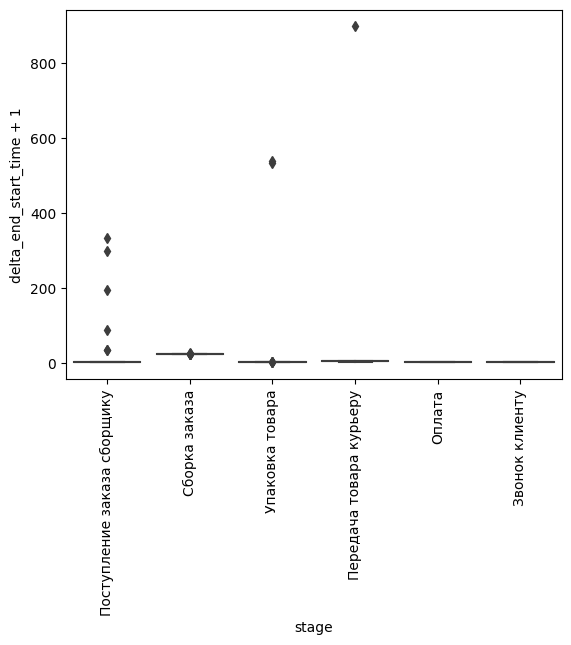

In [ ]:
sns.boxplot(data = rast_proc[(rast_proc['delta_end_start_time + 1'] > 0)],x = 'stage',y = 'delta_end_start_time + 1')
plt.xticks(rotation = 90);

In [ ]:
rast_proc[rast_proc['delta_end_start_time + 1'] > 0].groupby('stage').describe()['delta_end_start_time + 1'].reset_index().sort_values('count',ascending = False)

,stage,count,mean,std,min,25%,50%,75%,max
4,Сборка заказа,29.0,23.827586,0.468201,23.0,24.0,24.0,24.0,25.0
2,Передача товара курьеру,25.0,39.960000,178.551225,3.0,4.0,4.0,5.0,897.0
3,Поступление заказа сборщику,25.0,40.040000,92.945988,1.0,1.0,1.0,2.0,334.0
5,Упаковка товара,25.0,44.560000,147.909060,1.0,2.0,2.0,2.0,539.0
1,Оплата,16.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
0,Звонок клиенту,4.0,2.500000,0.577350,2.0,2.0,2.5,3.0,3.0


In [ ]:
rast_proc[rast_proc['delta_prics_end_start'] > 0]['delta_prics_end_start'].sum()

38310

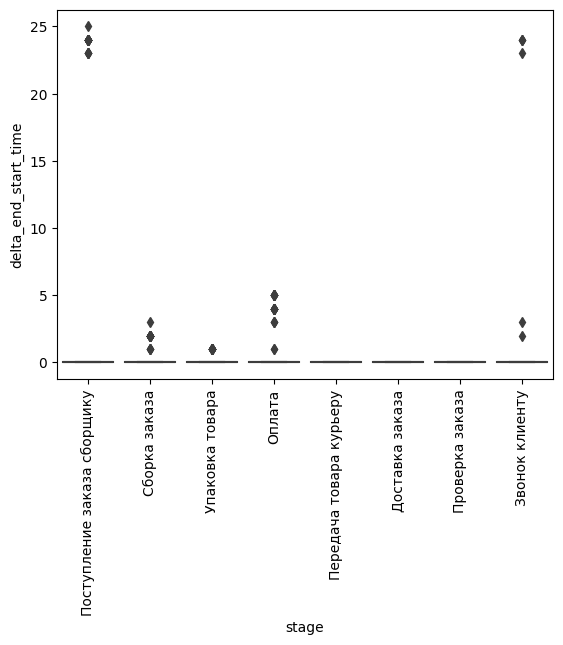

In [ ]:
sns.boxplot(y = df[df['delta_end_start_time'] <= 120]['delta_end_start_time'],x = df[(df['stage'] != 'Заказ оформлен') & (df['stage'] != 'Заказ доставлен') & (df['stage'] != 'Отмена заказа')]['stage'])
plt.xticks(rotation = 90);

In [ ]:
rast_proc[rast_proc['delta_prics_end_start'] > 0].groupby('stage').agg(['mean','sum'])['delta_prics_end_start'].reset_index().sort_values('sum',ascending = False)['sum']

<ipython-input-91-26149d605316>:1: FutureWarning: ['start_time', 'end_time', 'season'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  rast_proc[rast_proc['delta_prics_end_start'] > 0].groupby('stage').agg(['mean','sum'])['delta_prics_end_start'].reset_index().sort_values('sum',ascending = False)['sum'].sum()


38310

In [ ]:
for i in list(df[(df['stage'] != 'Заказ оформлен') & (df['stage'] != 'Заказ доставлен') & (df['stage'] != 'Отмена заказа')]['stage'].unique()):
  q75,q25 = np.percentile(df[df['stage'] == i]['delta_end_start_time'],[75,25])
  IQR = q75 - q25
  deli = q75 + (IQR * 1.5)
  print(i)
  print(deli)
  print(len(df[(df['stage'] == i) & (df['delta_end_start_time'] > deli)]))

Поступление заказа сборщику
0.0
25
Сборка заказа
0.0
27
Упаковка товара
0.0
14
Оплата
0.0
27
Передача товара курьеру
0.0
0
Доставка заказа
0.0
0
Проверка заказа
0.0
0
Звонок клиенту
0.0
6


<Axes: xlabel='last_stage', ylabel='Время перед последним этaпом'>

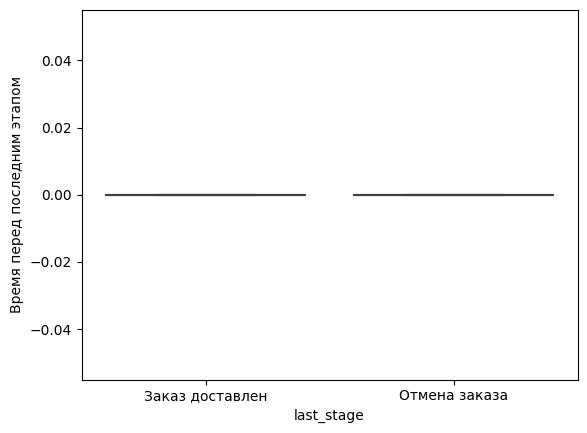

In [ ]:
sns.boxplot(data = test_1,x = test_1['last_stage'],y = test_1['Время перед последним этaпом'])

In [ ]:
df.groupby('stage').describe()['delta_time']

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
Доставка заказа,17865.0,32.581584,0.656504,31.0,32.0,33.0,33.0,34.0
Заказ доставлен,15100.0,0.083046,0.275961,0.0,0.0,0.0,0.0,1.0
Заказ оформлен,19988.0,0.088953,0.284684,0.0,0.0,0.0,0.0,1.0
Звонок клиенту,3690.0,2.178591,1.853492,0.0,1.0,2.0,3.0,11.0
Оплата,20248.0,0.419399,0.493473,0.0,0.0,0.0,1.0,1.0
Отмена заказа,4913.0,0.079788,0.270993,0.0,0.0,0.0,0.0,1.0
Передача товара курьеру,17870.0,6.684163,9.081130,1.0,4.0,4.0,5.0,41.0
Поступление заказа сборщику,20941.0,2.196648,5.608912,0.0,1.0,1.0,1.0,35.0
Проверка заказа,15557.0,1.644340,0.481006,1.0,1.0,2.0,2.0,3.0


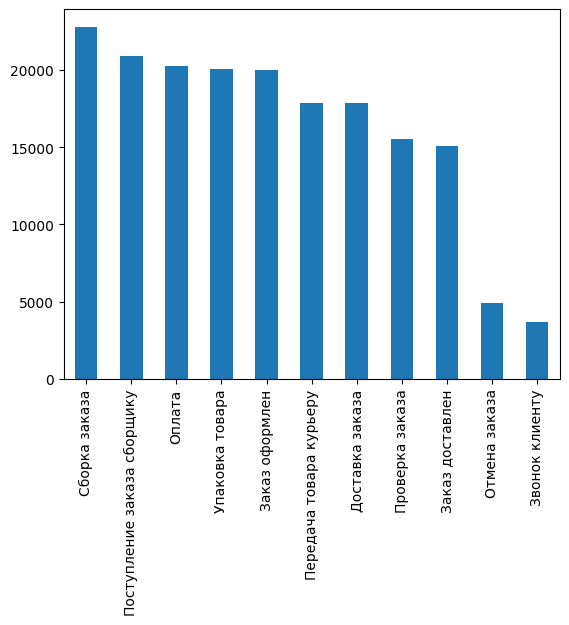

In [ ]:
df['stage'].value_counts(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 90);

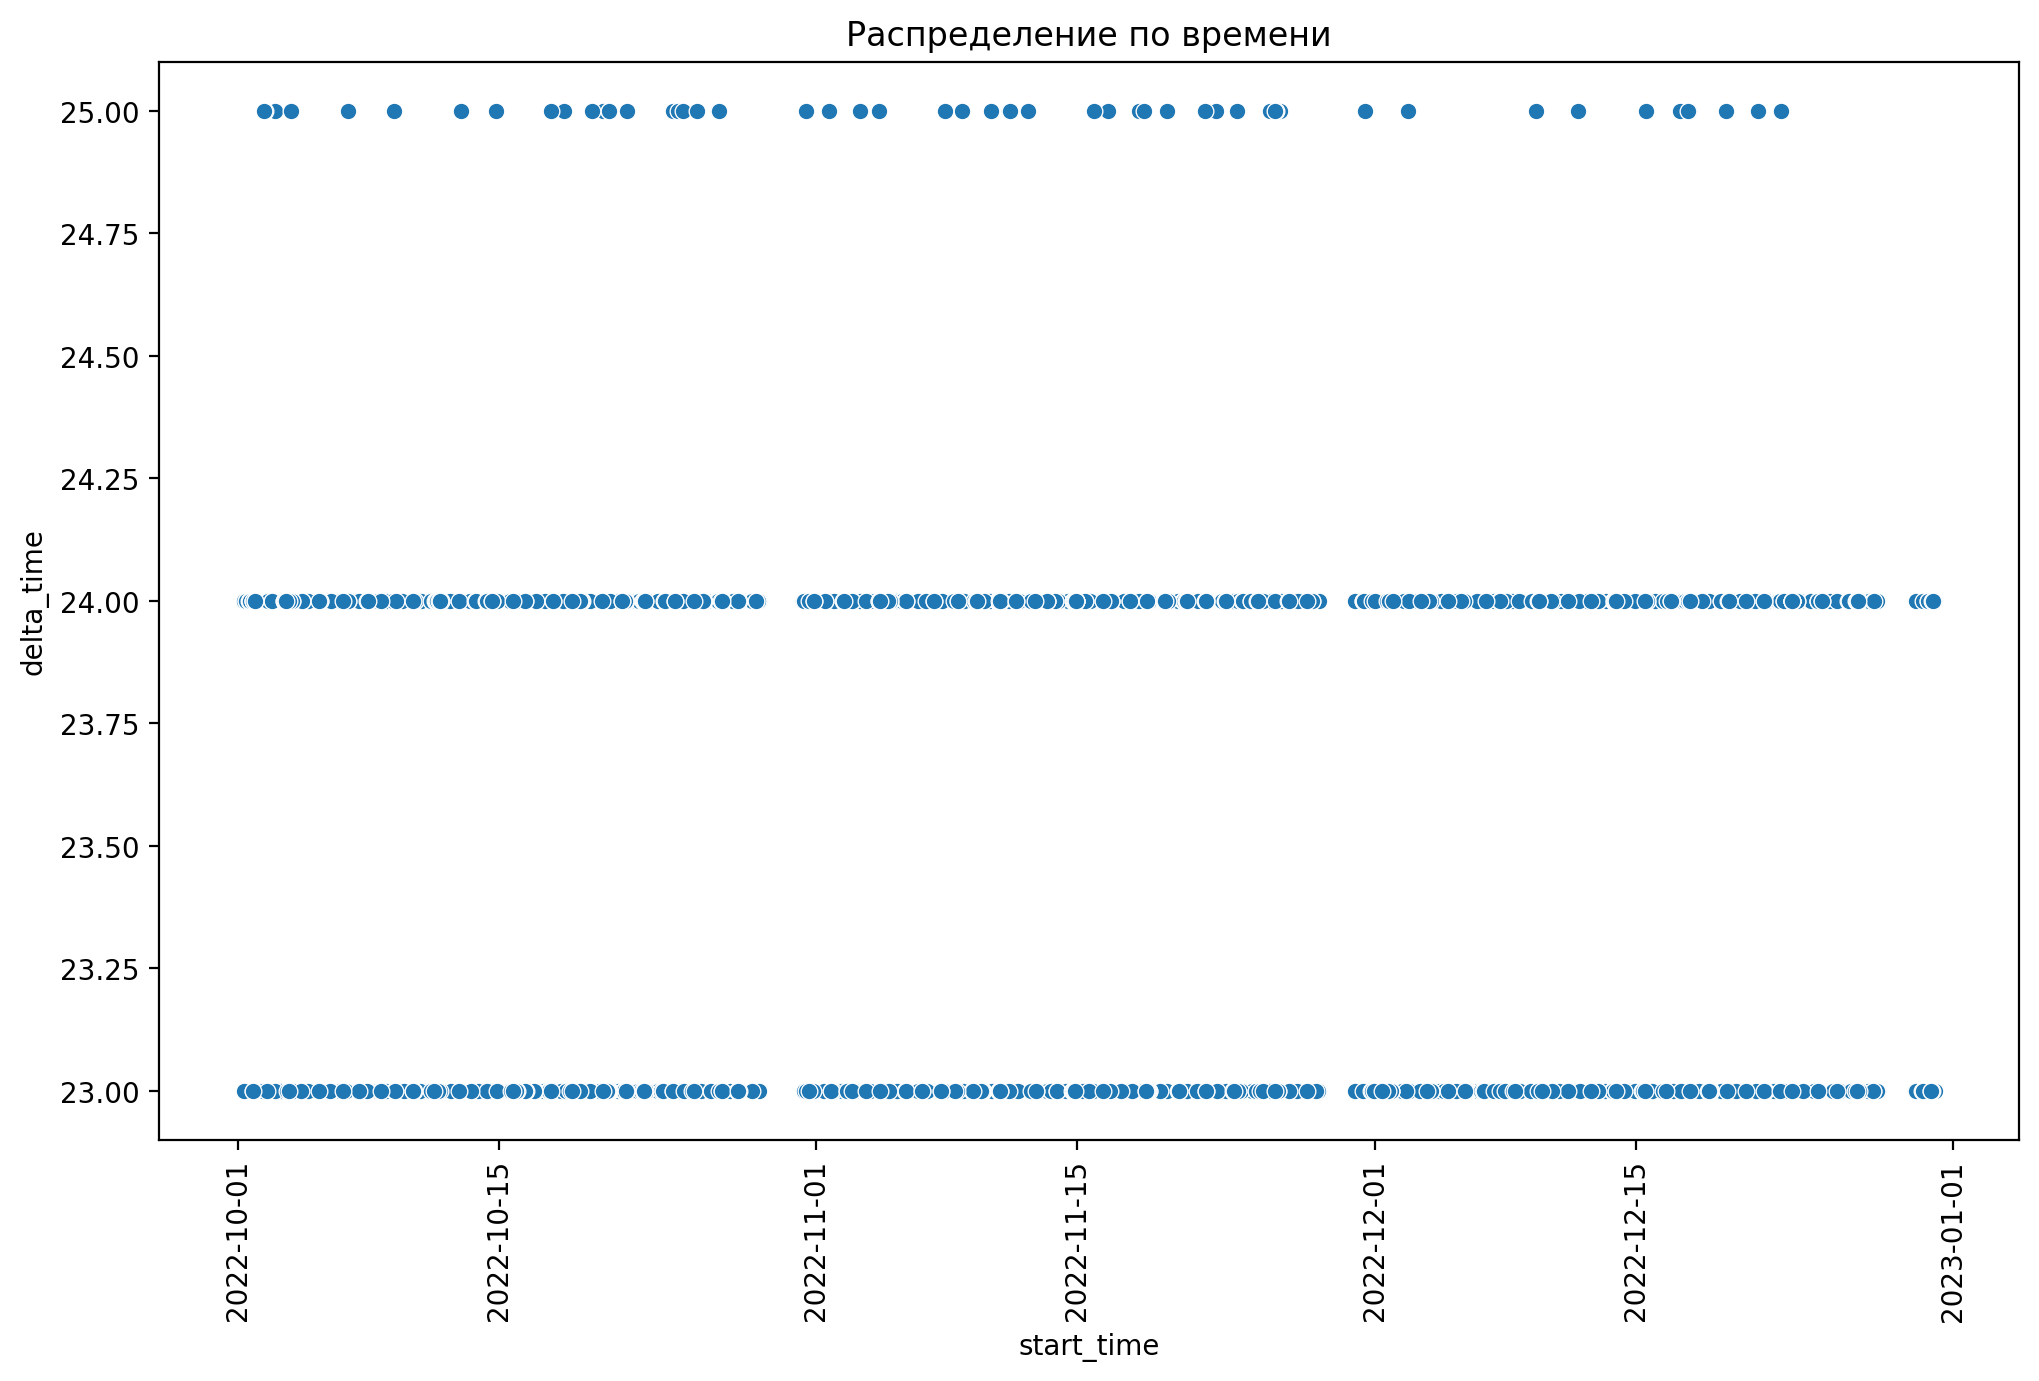

In [ ]:
plt.figure(figsize = (12,7),dpi = 200)
#sns.histplot(data = df[df['stage'] == 'Доставка заказа']['delta_time'],kde = True,bins = 200)
sns.scatterplot(data = df,y = df[df['stage'] == 'Сборка заказа']['delta_time'],x = df[df['stage'] == 'Сборка заказа']['start_time'])
plt.title('Распределение по времени')
plt.xticks(rotation = 90);

34.5

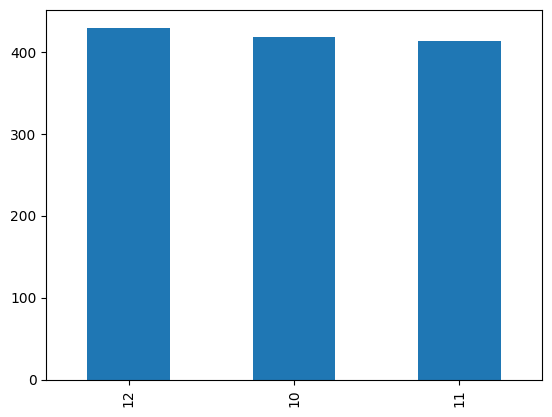

In [ ]:
q75,q25 = np.percentile(df[(df['stage'] == 'Доставка заказа')]['delta_time'],(75,25))
IQR = q75 - q25
deli = q75 + 1.5 * IQR
df[df['delta_time'] > deli]['month'].value_counts().plot(kind = 'bar')
deli

<Axes: xlabel='weekday', ylabel='count'>

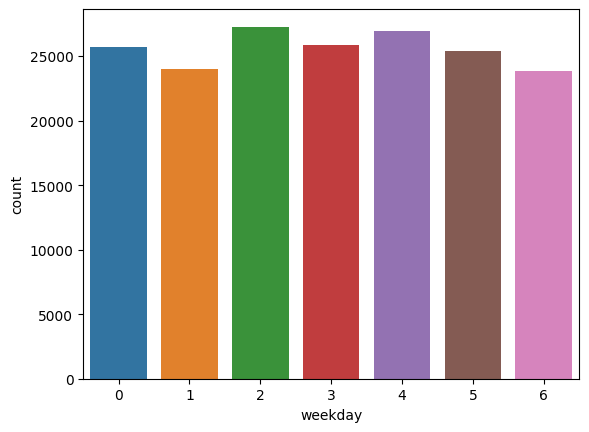

In [ ]:
sns.countplot(data = df,x = 'weekday')

In [ ]:
df.groupby(df['stage'])['delta_time'].describe().reset_index()

,stage,count,mean,std,min,25%,50%,75%,max
0,Доставка заказа,17870.0,32.582261,0.657657,31.0,32.0,33.0,33.0,35.0
1,Заказ доставлен,15100.0,0.083046,0.275961,0.0,0.0,0.0,0.0,1.0
2,Заказ оформлен,19988.0,0.088953,0.284684,0.0,0.0,0.0,0.0,1.0
3,Звонок клиенту,3690.0,2.178591,1.853492,0.0,1.0,2.0,3.0,11.0
4,Оплата,20248.0,0.419399,0.493473,0.0,0.0,0.0,1.0,1.0
5,Отмена заказа,4913.0,0.079788,0.270993,0.0,0.0,0.0,0.0,1.0
6,Передача товара курьеру,17870.0,6.684163,9.081130,1.0,4.0,4.0,5.0,41.0
7,Поступление заказа сборщику,20941.0,2.196648,5.608912,0.0,1.0,1.0,1.0,35.0
8,Проверка заказа,15557.0,1.644340,0.481006,1.0,1.0,2.0,2.0,3.0
9,Сборка заказа,22806.0,23.777953,0.421394,23.0,24.0,24.0,24.0,25.0


11    1698
12    1656
10    1559
Name: month, dtype: int64

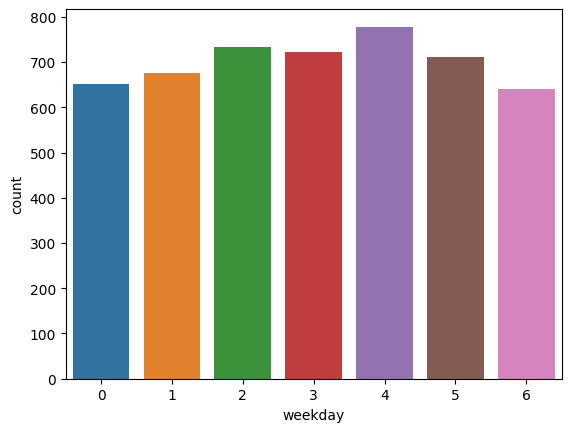

In [ ]:
sns.countplot(data = df[df['stage'] == 'Отмена заказа'],x = 'weekday')
df[(df['stage'] == 'Отмена заказа')]['month'].value_counts()

<ipython-input-140-04e4304095ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr())


<Axes: >

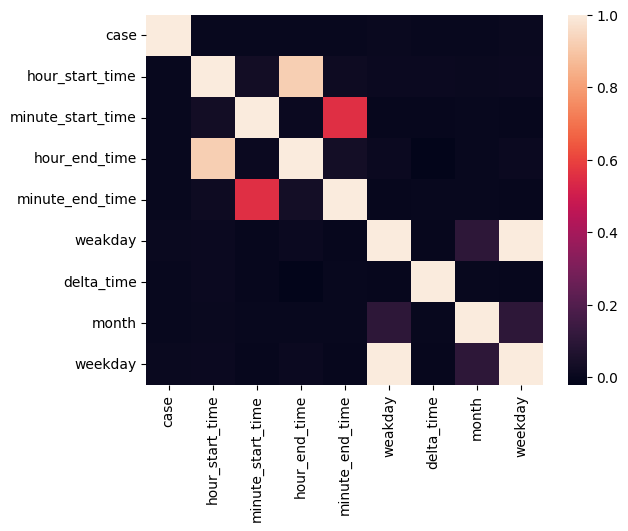

In [ ]:
sns.heatmap(data = df.corr())

In [ ]:
test = pd.DataFrame(columns = ['Причина отмены заказа','month','delta_time'])
df[df['stage'] == 'Отмена заказа']
for i in df[df['stage'] == 'Отмена заказа'].index:
  test.loc[len(test)] = [df['stage'].iloc[i - 1],df['month'].iloc[i - 1],df['delta_time'].iloc[i - 1]]


<Axes: >

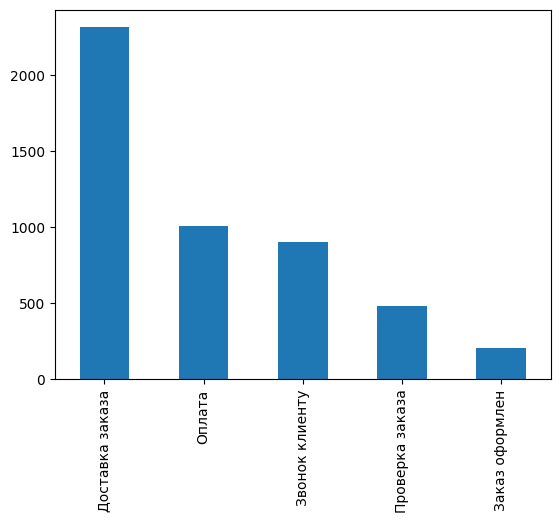

In [ ]:
test['Причина отмены заказа'].value_counts().plot(kind = 'bar')


In [ ]:
test.groupby('Причина отмены заказа').describe()['delta_time']

,count,mean,std,min,25%,50%,75%,max
Причина отмены заказа,,,,,,,,
Доставка заказа,2313.0,32.609166,0.661825,31.0,32.0,33.0,33.0,35.0
Заказ оформлен,207.0,0.096618,0.296154,0.0,0.0,0.0,0.0,1.0
Звонок клиенту,905.0,2.754696,1.518158,1.0,2.0,2.0,3.0,11.0
Оплата,1006.0,0.414513,0.492883,0.0,0.0,0.0,1.0,1.0
Проверка заказа,482.0,1.647303,0.478306,1.0,1.0,2.0,2.0,2.0


<Axes: xlabel='delta_time', ylabel='Count'>

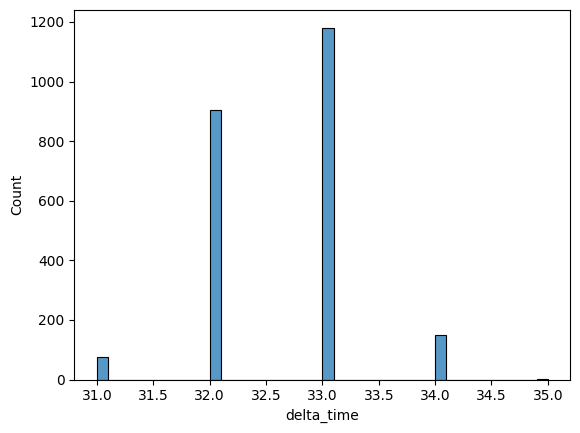

In [ ]:
sns.histplot(data = test[test['Причина отмены заказа'] == 'Доставка заказа'],x = test[test['Причина отмены заказа'] == 'Доставка заказа']['delta_time'],bins = 40)

In [ ]:
test_1 = df[['case','delta_time','stage','month','weekday','weekend','delta_end_start_time','start_time']].groupby('case').agg(list).reset_index()

In [ ]:
test_1['k_dupl'] = test_1['stage'].apply(lambda x: pd.DataFrame(x).duplicated().sum())
test_1['ind_dupl'] = test_1[['stage','k_dupl']].apply(lambda x: ''.join(map(str,pd.DataFrame(x['stage']).duplicated()[pd.DataFrame(x['stage']).duplicated()].index)) if x['k_dupl'] > 0 else '-',axis = 1)


In [ ]:
def word_ind(stage,ind_dupl):
  a = []
  if ind_dupl != '-':
    for i in ind_dupl:
      a.append(stage[int(i)])
    return list(set(a))
  else:
    return '-'

test_1['word_ind'] = test_1[['stage','ind_dupl']].apply(lambda x: word_ind(x['stage'],x['ind_dupl']),axis = 1)

In [ ]:
test_1['Поступление'] = test_1['word_ind'].apply(lambda x:x if 'Поступление заказа сборщику' in x else '-')

In [ ]:
test_1['all_time'] = test_1['delta_time'].apply(lambda x: sum(x))
test_1['month'] = test_1['month'].apply(lambda x: x[0])
test_1['Отмена'] = test_1['stage'].apply(lambda x: 'Отмена' if 'Отмена заказа' in x else 'Нет отмены')
test_1['Причина отмены'] = test_1[['stage','Отмена']].apply(lambda x: x['stage'][x['stage'].index('Отмена заказа') - 1] if x['Отмена'] == 'Отмена' else '-',axis = 1)
test_1['Время доставки'] = test_1[['stage','delta_time']].apply(lambda x: x['delta_time'][x['stage'].index('Доставка заказа')] if 'Доставка заказа' in x['stage'] else '-',axis = 1)
test_1['last_stage'] = test_1['stage'].apply(lambda x: x[-1])
test_1['count_d'] = test_1['stage'].apply(lambda x: x.count('Заказ оформлен'))
test_1['weekend'] = test_1['weekend'].apply(lambda x: x[0])
test_1['weekday'] = test_1['weekday'].apply(lambda x: x[0])
test_1['delta_end_start_time'] = test_1['delta_end_start_time'].apply(lambda x: x[:-1])
test_1['Время перед последним этaпом'] = test_1['delta_end_start_time'].apply(lambda x: x[-1])


In [ ]:
test_1['ind_dupl'][:7]

0      -
1      -
2      -
3      4
4      -
5      4
6    456
Name: ind_dupl, dtype: object

In [ ]:
test_2 = test_1.copy()
def final_all(ind_dupl,word_ind,delta_time,stage):
  if word_ind != '-':
    for i in range(len(word_ind)):
      dupl_ind = []
      first_ind = stage.index(word_ind[i])
      for p in range(len(stage)):
        if word_ind[i] == stage[p]:
          dupl_ind.append(p)
      delta_time[dupl_ind[0]] = sum([delta_time[int(q)] for q in dupl_ind])
    return delta_time
  else:
    return delta_time

test_1['delta_time_test'] = test_2[['ind_dupl','word_ind','delta_time','stage']].apply(lambda x: final_all(x['ind_dupl'],x['word_ind'],x['delta_time'],x['stage']),axis=1)

In [ ]:
def drop_dupl(delta_time,ind_dupl):
  if ind_dupl != '-':
    k = 0
    for i in ind_dupl:
      delta_time.pop(int(i) - k)
      k += 1
    return(delta_time)
  else:
    return(delta_time)


test_1[['delta_time','ind_dupl']].apply(lambda x: drop_dupl(x['delta_time'],x['ind_dupl']),axis = 1)

0        [0.0, 1.0, 24.0, 2.0, 0.0, 5.0, 33.0, 2.0, 0.0]
1        [0.0, 1.0, 24.0, 2.0, 0.0, 4.0, 33.0, 2.0, 0.0]
2                        [0.0, 1.0, 24.0, 2.0, 1.0, 0.0]
3        [0.0, 1.0, 24.0, 4.0, 0.0, 4.0, 32.0, 2.0, 0.0]
4        [0.0, 1.0, 24.0, 1.0, 1.0, 5.0, 33.0, 1.0, 0.0]
                              ...                       
19983         [0.0, 1.0, 24.0, 2.0, 0.0, 6.0, 33.0, 0.0]
19984    [0.0, 1.0, 24.0, 2.0, 1.0, 4.0, 32.0, 2.0, 0.0]
19985         [0.0, 1.0, 24.0, 2.0, 0.0, 3.0, 33.0, 0.0]
19986    [1.0, 1.0, 23.0, 3.0, 0.0, 4.0, 32.0, 2.0, 0.0]
19987                    [0.0, 1.0, 24.0, 2.0, 1.0, 0.0]
Length: 19988, dtype: object

In [ ]:
def drop_dupl(stage,ind_dupl):
  if ind_dupl != '-':
    k = 0
    for i in ind_dupl:
      stage.pop(int(i) - k)
      k += 1
    return(stage)
  else:
    return(stage)


test_1[['stage','ind_dupl']].apply(lambda x: drop_dupl(x['stage'],x['ind_dupl']),axis = 1)

0        [Заказ оформлен, Поступление заказа сборщику, ...
1        [Заказ оформлен, Поступление заказа сборщику, ...
2        [Заказ оформлен, Поступление заказа сборщику, ...
3        [Заказ оформлен, Поступление заказа сборщику, ...
4        [Заказ оформлен, Поступление заказа сборщику, ...
                               ...                        
19983    [Заказ оформлен, Поступление заказа сборщику, ...
19984    [Заказ оформлен, Поступление заказа сборщику, ...
19985    [Заказ оформлен, Поступление заказа сборщику, ...
19986    [Заказ оформлен, Поступление заказа сборщику, ...
19987    [Заказ оформлен, Поступление заказа сборщику, ...
Length: 19988, dtype: object

In [ ]:
print(test_1[['delta_time','stage','delta_time_test','word_ind']][:10].to_string())

                                        delta_time                                                                                                                                                              stage                                  delta_time_test                         word_ind
0  [0.0, 1.0, 24.0, 2.0, 0.0, 5.0, 33.0, 2.0, 0.0]  [Заказ оформлен, Поступление заказа сборщику, Сборка заказа, Упаковка товара, Оплата, Передача товара курьеру, Доставка заказа, Проверка заказа, Заказ доставлен]  [0.0, 1.0, 24.0, 2.0, 0.0, 5.0, 33.0, 2.0, 0.0]                                -
1  [0.0, 1.0, 24.0, 2.0, 0.0, 4.0, 33.0, 2.0, 0.0]  [Заказ оформлен, Поступление заказа сборщику, Сборка заказа, Упаковка товара, Оплата, Передача товара курьеру, Доставка заказа, Проверка заказа, Заказ доставлен]  [0.0, 1.0, 24.0, 2.0, 0.0, 4.0, 33.0, 2.0, 0.0]                                -
2                  [0.0, 1.0, 24.0, 2.0, 1.0, 0.0]                                                              

In [ ]:
test_1['delta_end_start_time'].apply(lambda x: x[-1] > 0).sum()

0

In [ ]:
test_1

,case,delta_time,stage,month,weekday,weekend,delta_end_start_time,start_time,k_dupl,ind_dupl,word_ind,Поступление,all_time,Отмена,Причина отмены,Время доставки,last_stage,count_d,Время перед последним этaпом
0,10007845189,"[0.0, 1.0, 24.0, 2.0, 0.0, 5.0, 33.0, 2.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",10,6,1,"[0, 0, 0, 0, 0, 0, 0, 0]","[2022-10-23 19:25:00, 2022-10-23 19:25:00, 202...",0,-,-,-,67.0,Нет отмены,-,33.0,Заказ доставлен,1,0
1,10013763250,"[0.0, 1.0, 24.0, 2.0, 0.0, 4.0, 33.0, 2.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",10,3,0,"[0, 0, 0, 0, 0, 0, 0, 0]","[2022-10-20 09:27:00, 2022-10-20 09:27:00, 202...",0,-,-,-,66.0,Нет отмены,-,33.0,Заказ доставлен,1,0
2,10017161163,"[0.0, 1.0, 24.0, 2.0, 1.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",12,5,1,"[0, 0, 0, 0, 0]","[2022-12-03 16:28:00, 2022-12-03 16:28:00, 202...",0,-,-,-,28.0,Отмена,Оплата,-,Отмена заказа,1,0
3,10024115929,"[0.0, 1.0, 24.0, 2.0, 2.0, 0.0, 4.0, 32.0, 2.0...","[Заказ оформлен, Поступление заказа сборщику, ...",12,2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[2022-12-21 15:43:00, 2022-12-21 15:43:00, 202...",1,4,[Упаковка товара],-,67.0,Нет отмены,-,32.0,Заказ доставлен,1,0
4,10027814634,"[0.0, 1.0, 24.0, 1.0, 1.0, 5.0, 33.0, 1.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",11,2,0,"[0, 0, 0, 0, 0, 0, 0, 0]","[2022-11-16 15:20:00, 2022-11-16 15:20:00, 202...",0,-,-,-,66.0,Нет отмены,-,33.0,Заказ доставлен,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,89970176732,"[0.0, 1.0, 24.0, 2.0, 0.0, 6.0, 33.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",10,6,1,"[0, 0, 0, 0, 0, 0, 0]","[2022-10-16 17:43:00, 2022-10-16 17:43:00, 202...",0,-,-,-,66.0,Отмена,Доставка заказа,33.0,Отмена заказа,1,0
19984,89972656636,"[0.0, 1.0, 24.0, 2.0, 1.0, 4.0, 32.0, 2.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",11,0,0,"[0, 0, 0, 0, 0, 0, 0, 0]","[2022-11-14 08:44:00, 2022-11-14 08:44:00, 202...",0,-,-,-,66.0,Нет отмены,-,32.0,Заказ доставлен,1,0
19985,89976363430,"[0.0, 1.0, 24.0, 2.0, 0.0, 3.0, 33.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",11,6,1,"[0, 0, 0, 0, 0, 0, 0]","[2022-11-13 19:13:00, 2022-11-13 19:13:00, 202...",0,-,-,-,63.0,Отмена,Доставка заказа,33.0,Отмена заказа,1,0
19986,89978783590,"[1.0, 1.0, 23.0, 3.0, 0.0, 4.0, 32.0, 2.0, 0.0]","[Заказ оформлен, Поступление заказа сборщику, ...",11,4,0,"[0, 0, 0, 0, 0, 0, 0, 0]","[2022-11-25 14:00:00, 2022-11-25 14:01:00, 202...",0,-,-,-,66.0,Нет отмены,-,32.0,Заказ доставлен,1,0


In [ ]:
(test_1['all_time'] == test_1['delta_time'].apply(lambda x: sum(x))).sum()

0        67.0
1        66.0
2        28.0
3        67.0
4        66.0
         ... 
19983    66.0
19984    66.0
19985    63.0
19986    66.0
19987    28.0
Name: all_time, Length: 19988, dtype: float64

In [ ]:
test_1['word_ind'].value_counts()

-                                                                        14713
[Сборка заказа]                                                           1047
[Оплата]                                                                  1044
[Поступление заказа сборщику, Сборка заказа]                              1012
[Упаковка товара]                                                          888
[Звонок клиенту, Сборка заказа]                                            609
[Звонок клиенту]                                                           256
[Сборка заказа, Оплата]                                                     75
[Поступление заказа сборщику, Сборка заказа, Оплата]                        69
[Упаковка товара, Сборка заказа]                                            64
[Упаковка товара, Оплата]                                                   62
[Поступление заказа сборщику, Упаковка товара, Сборка заказа]               59
[Звонок клиенту, Сборка заказа, Оплата]             

In [ ]:
test_1['delta_сборка_доставка'] = test_1[['stage','delta_time','delta_end_start_time']].apply(lambda x: (sum(x['delta_time'][x['stage'].index('Сборка заказа'):x['stage'].index('Доставка заказа')])) + (sum(x['delta_end_start_time'][int(x['stage'].index('Сборка заказа')):int(x['stage'].index('Доставка заказа'))])) if 'Доставка заказа' in x['stage'] and 'Сборка заказа' in x['stage'] else '-',axis = 1)
test_1['all_time_end_start'] = test_1[['delta_time','delta_end_start_time']].apply(lambda x: sum(x['delta_time']) + sum(x['delta_end_start_time'][:-1]),axis = 1)

In [ ]:
for i in list(df['stage'].unique()):
  q75,q25 = np.percentile(df[df['stage'] == i]['delta_time'],[75,25])
  IQR = q75 - q25
  deli = q75 + (IQR * 1.5)
  print(i)
  print(deli)
  print(len(df[(df['stage'] == i) & (df['delta_time'] > deli)]))

count     10896.0
unique       46.0
top           1.0
freq       4758.0
Name: delta_сборка_доставка, dtype: float64

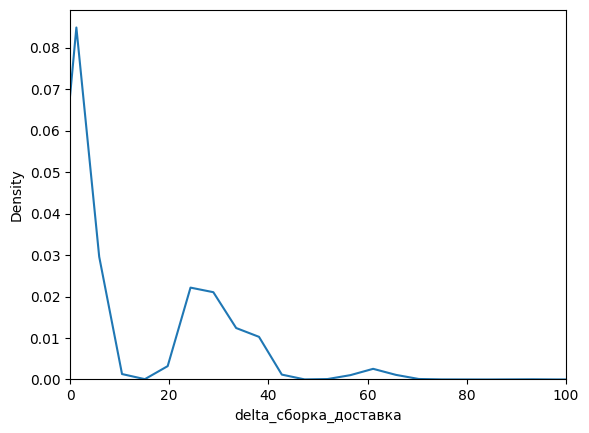

In [ ]:
op = test_1[test_1['delta_сборка_доставка'] != '-']['delta_сборка_доставка'] - 30
sns.kdeplot(data = op[op > 0])
plt.xlim(0,100)
op[op > 0]

32.0 30.0


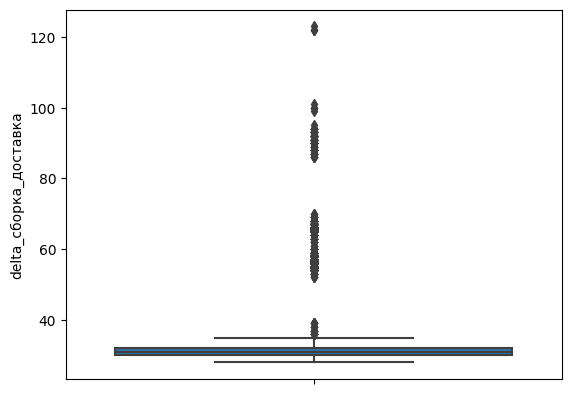

In [ ]:
t = test_1[test_1['delta_сборка_доставка'] != '-']
sns.boxplot(data = test_1,y = t[t['delta_сборка_доставка'] < 200]['delta_сборка_доставка'])
#test_1[['stage','delta_time','delta_end_start_time']].apply(lambda x: sum(x['delta_end_start_time'][x['stage'].index('Сборка заказа'):x['stage'].index('Доставка заказа')]) + (sum(x['delta_end_start_time'][int(x['stage'].index('Сборка заказа')):int(x['stage'].index('Доставка заказа'))])) if 'Доставка заказа' in x['stage'] and 'Сборка заказа' in x['stage'] else '-',axis = 1)
q75,q25 = np.percentile(t[t['delta_сборка_доставка'] < 200]['delta_сборка_доставка'],[75,25])
IQR = q75 - q25
deli = q75 + 1.5*IQR
te = t[t['delta_сборка_доставка'] < 200]
print(q75,q25)


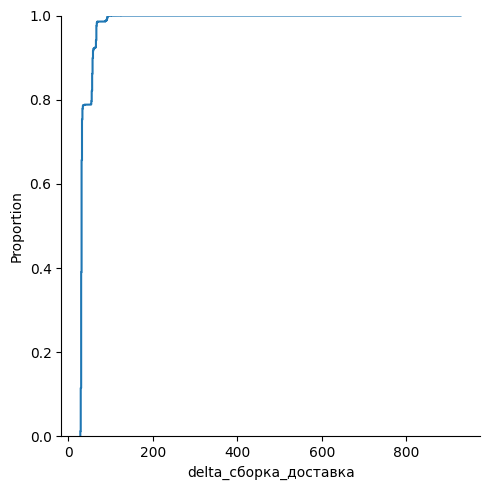

In [ ]:
#test_1[test_1['delta_сборка_доставка'] != '-']['delta_сборка_доставка'].value_counts()
sns.displot(data = test_1,x = test_1[test_1['delta_сборка_доставка'] != '-']['delta_сборка_доставка'],kind = "ecdf")

In [ ]:
t = test_1[test_1['delta_сборка_доставка'] != '-']
print(t[t['delta_сборка_доставка'] < 0][['stage','delta_time','start_time','delta_end_start_time']].to_string())

                                                                                                                                                                                  stage                                            delta_time                                                                                                                                                                                                          start_time                   delta_end_start_time
19050  [Заказ оформлен, Поступление заказа сборщику, Сборка заказа, Упаковка товара, Оплата, Передача товара курьеру, Доставка заказа, Проверка заказа, Отмена заказа, Заказ доставлен]  [0.0, 1.0, 24.0, 2.0, 1.0, 3.0, 33.0, 2.0, 0.0, 0.0]  [2022-12-01 23:02:00, 2022-12-01 23:03:00, 2022-12-01 23:28:00, 2022-12-01 23:54:00, 2022-12-01 23:56:00, 2022-12-02 09:00:00, 2022-12-02 09:03:00, 2022-12-02 09:36:00, 2022-12-02 09:38:00, 2022-12-02 09:38:00]  [1, 24, 2, 0, -897, 0, 0, 0, 0, -578]


In [ ]:
a = test_1[test_1['delta_сборка_доставка'] != '-']
a[a['delta_сборка_доставка'] > 250]

,case,delta_time,stage,month,weekday,weekend,delta_end_start_time,start_time,k_dupl,ind_dupl,...,Поступление,all_time,Отмена,Причина отмены,Время доставки,last_stage,count_d,Время перед последним этaпом,delta_сборка_доставка,all_time_end_start
8659,44699404389,"[0.0, 33.0, 24.0, 3.0, 24.0, 1.0, 0.0, 3.0, 33...","[Заказ оформлен, Поступление заказа сборщику, ...",12,4,0,"[34, 25, 2, 24, 539, 1, 4, 0, 0, 0, 0]","[2022-12-02 21:12:00, 2022-12-02 21:46:00, 202...",1,4,...,-,123.0,Отмена,Проверка заказа,33.0,Заказ доставлен,1,0,625.0,752.0
8735,45020756974,"[0.0, 1.0, 24.0, 2.0, 0.0, 5.0, 32.0, 2.0, 0.0...","[Заказ оформлен, Поступление заказа сборщику, ...",12,5,1,"[1, 24, 533, 0, 5, 0, 0, 0, 0]","[2022-12-03 23:17:00, 2022-12-03 23:18:00, 202...",0,-,...,-,66.0,Отмена,Проверка заказа,32.0,Заказ доставлен,1,0,569.0,629.0
19050,86369405113,"[0.0, 1.0, 24.0, 2.0, 1.0, 3.0, 33.0, 2.0, 0.0...","[Заказ оформлен, Поступление заказа сборщику, ...",12,3,0,"[1, 24, 2, 0, 897, 0, 0, 0, 0]","[2022-12-01 23:02:00, 2022-12-01 23:03:00, 202...",0,-,...,-,66.0,Отмена,Проверка заказа,33.0,Заказ доставлен,1,0,929.0,990.0


In [ ]:
test_1['test'] = test_1[['stage','delta_time','delta_end_start_time']].apply(lambda x: (sum(x['delta_end_start_time'][int(x['stage'].index('Сборка заказа')):int(x['stage'].index('Доставка заказа'))])) if 'Доставка заказа' in x['stage'] and 'Сборка заказа' in x['stage'] else '-',axis = 1)

<Axes: >

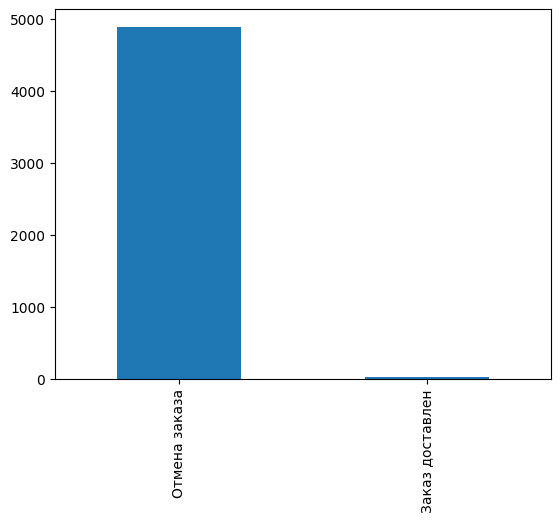

In [ ]:
test_1[test_1['Отмена'] == 'Отмена']['last_stage'].value_counts().plot(kind = 'bar')

In [ ]:
print(test_1.sort_values('sum_delta_end_start',ascending = False)[['stage','delta_end_start_time','sum_delta_end_start']][:20].to_string())

                                                                                                                                                                                                               stage                   delta_end_start_time  sum_delta_end_start
0                                                  [Заказ оформлен, Поступление заказа сборщику, Сборка заказа, Упаковка товара, Оплата, Передача товара курьеру, Доставка заказа, Проверка заказа, Заказ доставлен]       [0, 0, 0, 0, 0, 0, 0, 0, -10111]              17845.0
7                                                  [Заказ оформлен, Поступление заказа сборщику, Сборка заказа, Упаковка товара, Оплата, Передача товара курьеру, Доставка заказа, Проверка заказа, Заказ доставлен]        [0, 0, 0, 0, 0, 0, 0, 0, 20113]                  5.0
6                                                                         [Заказ оформлен, Поступление заказа сборщику, Сборка заказа, Звонок клиенту, Звонок клиенту, Сборка заказа,

In [ ]:
test_1[(test_1['Отмена'] == 'Отмена') & (test_1['last_stage'] == 'Отмена заказа')]['all_time'].mean()

53.77986906710311

In [ ]:
test_1[(test_1['Отмена'] == 'Нет отмены') & (test_1['last_stage'] == 'Заказ доставлен')]['all_time'].mean()

73.70799336650083

In [ ]:
for i in list(df['stage'].unique()):
  q75,q25 = np.percentile(df[df['stage'] == i]['delta_time'],[75,25])
  IQR = q75 - q25
  deli = q75 + (IQR * 1.5)
  print(i)
  print(deli)
  print(len(df[(df['stage'] == i) & (df['delta_time'] > deli)]))

<Axes: ylabel='all_time'>

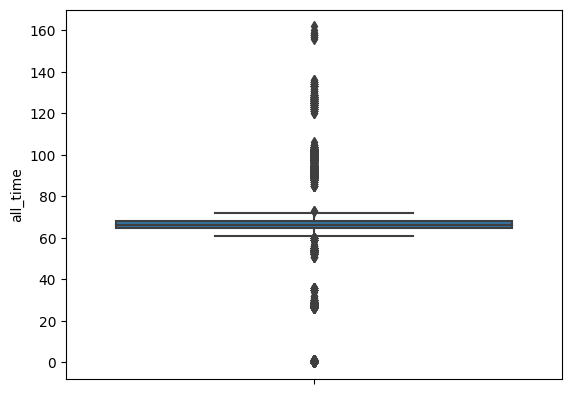

In [ ]:
sns.boxplot(data = test_1,y = 'all_time')

In [ ]:
test_1[test_1['Отмена'] == 'Отмена'][['all_time','all_time_end_start']].apply(lambda x: x['all_time'] // x['all_time_end_start'],axis = 1).value_counts()


<ipython-input-25-6c08bc388be8>:1: RuntimeWarning: invalid value encountered in double_scalars
  test_1[test_1['Отмена'] == 'Отмена'][['all_time','all_time_end_start']].apply(lambda x: x['all_time'] // x['all_time_end_start'],axis = 1).value_counts()


1.0    4720
0.0      25
dtype: int64

<Axes: xlabel='Сборка заказа', ylabel='Count'>

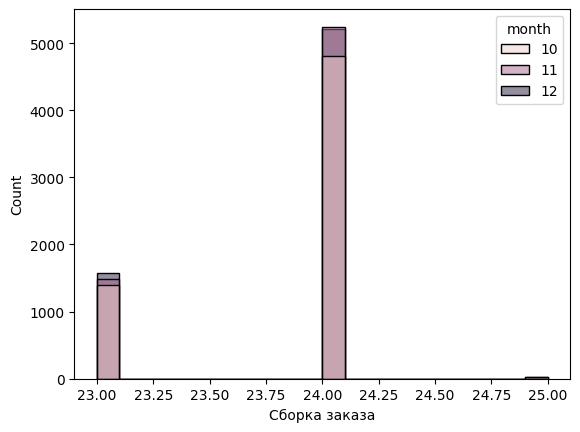

In [ ]:
sns.histplot(data = test_2,x = test_2[test_2['Сборка заказа'] != '-']['Сборка заказа'],bins = 20,hue = 'month')

<Axes: xlabel='month', ylabel='Сборка заказа'>

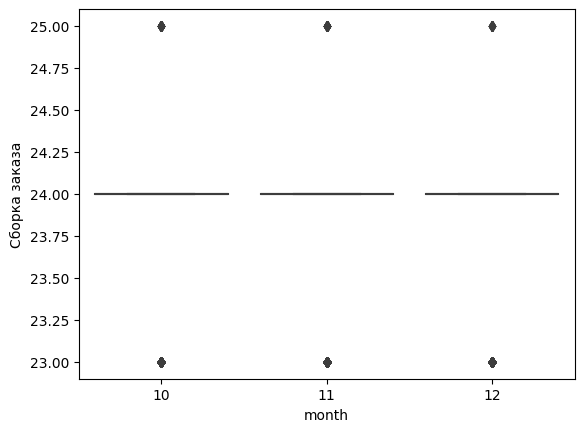

In [ ]:
sns.boxplot(data = test_2,y = test_2[test_2['Сборка заказа'] != '-']['Сборка заказа'],x = 'month')

<Axes: xlabel='Время доставки', ylabel='Count'>

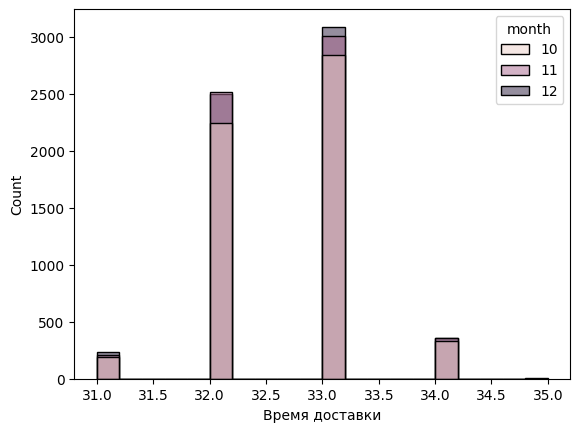

In [ ]:
sns.histplot(data = test_2,x = test_2[test_2['Время доставки'] != '-']['Время доставки'],bins = 20,hue = 'month')

<Axes: xlabel='month', ylabel='Время доставки'>

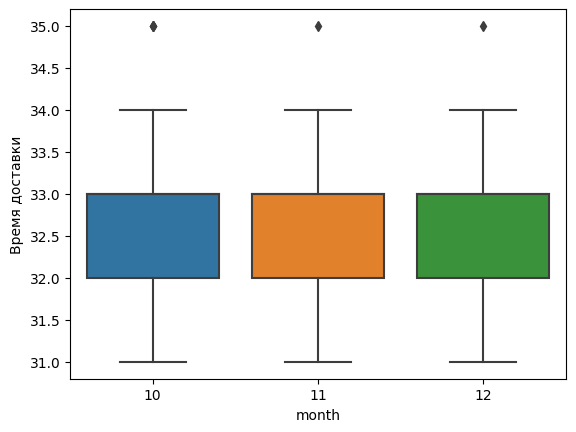

In [ ]:
sns.boxplot(data = test_2,y = test_2[test_2['Время доставки'] != '-']['Время доставки'],x = 'month')

<Axes: xlabel='Сборка заказа', ylabel='Count'>

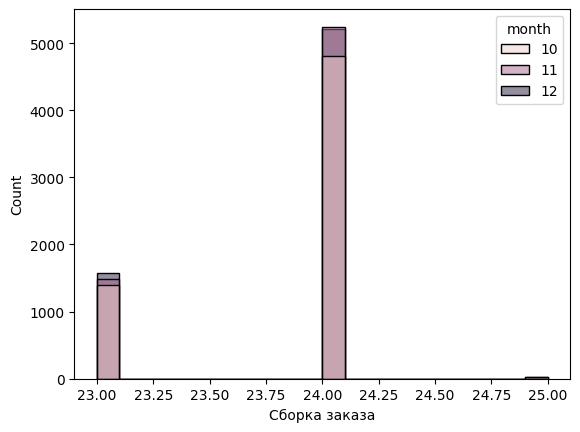

In [ ]:
sns.histplot(data = test_2,x = test_2[test_2['Сборка заказа'] != '-']['Сборка заказа'],bins = 20,hue = 'month')

<Axes: xlabel='month', ylabel='Сборка заказа'>

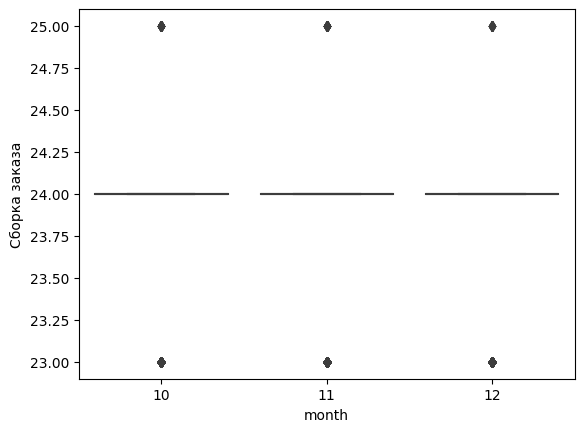

In [ ]:
sns.boxplot(data = test_2,y = test_2[test_2['Сборка заказа'] != '-']['Сборка заказа'],x = 'month')

33.0

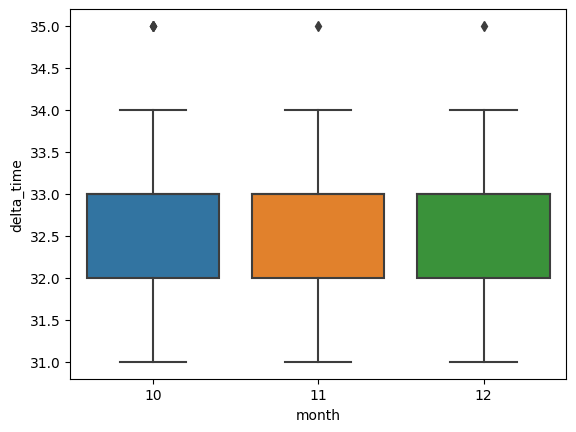

In [ ]:
sns.boxplot(data = df[df['stage'] == 'Доставка заказа'],y = df[df['stage'] == 'Доставка заказа']['delta_time'],x = df['month'])
q75,q25 = np.percentile(df[(df['stage'] == 'Доставка заказа') & (df['month'] == 10)]['delta_time'],[75,25])
IQR = q75 - q25
deli = q75 + 1.5 * IQR


<Axes: xlabel='month', ylabel='delta_time'>

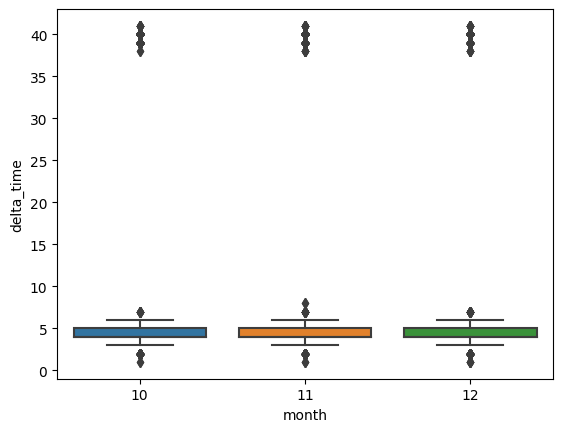

In [ ]:
df.groupby('stage').describe()['delta_time']
df[df['stage'] == 'Поступление заказа сборщику']['delta_time'].value_counts()
sns.boxplot(data = df,y = df[df['stage'] == 'Передача товара курьеру']['delta_time'],x = df['month'])

In [ ]:
df[(df['stage'] == 'Передача товара курьеру') & (df['month'] == 10)]['delta_time'].value_counts()


4.0     2173
5.0     1526
3.0      983
6.0      352
40.0     214
39.0     186
2.0      156
7.0       11
41.0      11
38.0       2
1.0        2
Name: delta_time, dtype: int64

In [ ]:
df[(df['stage'] == 'Передача товара курьеру') & (df['month'] == 11)]['delta_time'].value_counts()
plt.figure(figsize = (12,7),dpi = 200)
sns.histplot(data = df,x = df[(df['stage'] == 'Передача товара курьеру') & (df['month'] == 12)]['delta_time'],kde = True)


In [ ]:
df[(df['stage'] == 'Передача товара курьеру') & (df['month'] == 12)]['delta_time'].value_counts()

4.0     2467
5.0     1669
3.0     1029
6.0      383
40.0     246
39.0     160
2.0      157
7.0       26
41.0      13
38.0       9
1.0        6
Name: delta_time, dtype: int64

In [ ]:
test_1[test_1['Отмена'] == 'Отмена']['Причина отмены']

582245.0

In [ ]:
test_1[(test_1['Отмена'] == 'Отмена') & (test_1['last_stage'] == 'Заказ доставлен')]
test_1[test_1['delta_time'].apply(lambda x: x[1] if len(x) >= 3 else 0) > 23]
test_1['Передача курьеру'] = test_1['stage'].apply(lambda x: x.index('Передача товара курьеру') if 'Передача товара курьеру' in x else 0)
p = test_1[test_1[['delta_time','Передача курьеру']].apply(lambda x: x['delta_time'][x['Передача курьеру']] >= 34,axis = 1)]
p[['delta_time','Передача курьеру']].apply(lambda x: x['delta_time'][x['Передача курьеру']:][1] == 0,axis = 1)

case
10323051980    False
10383466708    False
10399727036    False
10451821341    False
10454119140    False
               ...  
89489711988    False
89646919772    False
89664098402    False
89720697303    False
89857328278    False
Length: 1253, dtype: bool

In [ ]:
y = test_1['Отмена']
x = test_1['stage']

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
x = tv.fit_transform(x)
map(lambda x:x.lower(), test_1['stage'])
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'russian')
matrix = cv.fit_transform(test_1[test_1['Отмена'] == 'Отмена']['stage'])
freqs = zip(cv.get_feature_names_out(),matrix.sum(axis = 0).tolist()[0])

print(sorted(freqs,key = lambda x: -x[1]))


In [ ]:
gip_1 = pd.DataFrame(columns = ['Отмена','Stage'])
gip_1['Stage'] = test_1['stage'].apply(lambda x: ' '.join(x))
gip_1['Отмена'] = test_1['Отмена']

In [ ]:
gip_1

,Отмена,Stage
0,Нет отмены,Заказ оформлен Поступление заказа сборщику Сбо...
1,Нет отмены,Заказ оформлен Поступление заказа сборщику Сбо...
2,Отмена,Заказ оформлен Поступление заказа сборщику Сбо...
3,Нет отмены,Заказ оформлен Поступление заказа сборщику Сбо...
4,Нет отмены,Заказ оформлен Поступление заказа сборщику Сбо...
...,...,...
19983,Отмена,Заказ оформлен Поступление заказа сборщику Сбо...
19984,Нет отмены,Заказ оформлен Поступление заказа сборщику Сбо...
19985,Отмена,Заказ оформлен Поступление заказа сборщику Сбо...
19986,Нет отмены,Заказ оформлен Поступление заказа сборщику Сбо...


In [ ]:
y = gip_1['Отмена']
x = gip_1['Stage']

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
x = tv.fit_transform(x)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(gip_1[gip_1['Отмена'] == 'Отмена']['Stage'])
freqs = zip(cv.get_feature_names_out(),matrix.sum(axis = 0).tolist()[0])

print(sorted(freqs,key = lambda x: -x[1]))



[('заказа', 18579), ('товара', 6819), ('сборка', 5412), ('поступление', 4977), ('сборщику', 4977), ('заказ', 4938), ('отмена', 4913), ('оформлен', 4913), ('оплата', 4064), ('упаковка', 4024), ('доставка', 2795), ('курьеру', 2795), ('передача', 2795), ('звонок', 1784), ('клиенту', 1784), ('проверка', 482), ('доставлен', 25)]


In [ ]:
matrix.todense()

matrix([[0, 1],
        [1, 0]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param_grid = {'n_estimators':[64,100,128,200],
              'bootstrap':[True,False],
              'oob_score':[True,False]}

from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(rfc,
                          param_grid = param_grid)

grid_model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
test_1['len_op'] = test_1['stage'].apply(lambda x: len(x))
test_1[test_1['len_op'] == 14]
test_1[test_1.index == 43688325829]['stage']

In [ ]:
from sklearn.metrics import classification_report
pred = grid_model.predict(x)
print(classification_report(y,pred))

              precision    recall  f1-score   support

  Нет отмены       1.00      1.00      1.00     15075
      Отмена       1.00      1.00      1.00      4913

    accuracy                           1.00     19988
   macro avg       1.00      1.00      1.00     19988
weighted avg       1.00      1.00      1.00     19988

